In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier

In [3]:
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [4]:
m, n = 100, 100
x = Domain([0, 1], m)
mu = Domain([0, 1], n)
r = 32
#i = np.arange(0, r)
#N = np.arange(1, r+1)

In [5]:
epsilon = 0.025
u_hs = Heaviside()
u_C0 = CkRamp(epsilon, 0)
u_C1 = CkRamp(epsilon, 1)
u_C2 = CkRamp(epsilon, 2)
u_C3 = CkRamp(epsilon, 3)
u_C4 = CkRamp(epsilon, 4)
u_C5 = CkRamp(epsilon, 5)
u_sg = Sigmoid(epsilon)

In [6]:
u_k = u_hs

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


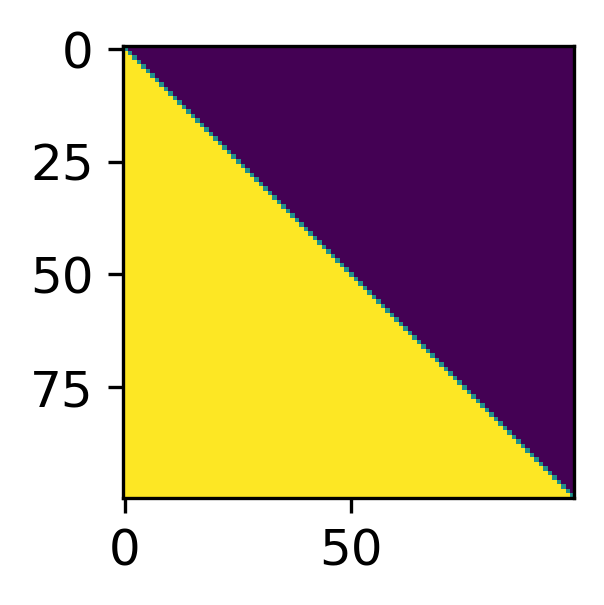

In [7]:
X = u_k.half_wave_odd(x(), mu())
plt.imshow(X)

In [8]:
trig_basis_odd = TrigonometricOdd(x())

(32, 100, 100) (100, 100)
(32, 100, 100)
(32, 100)


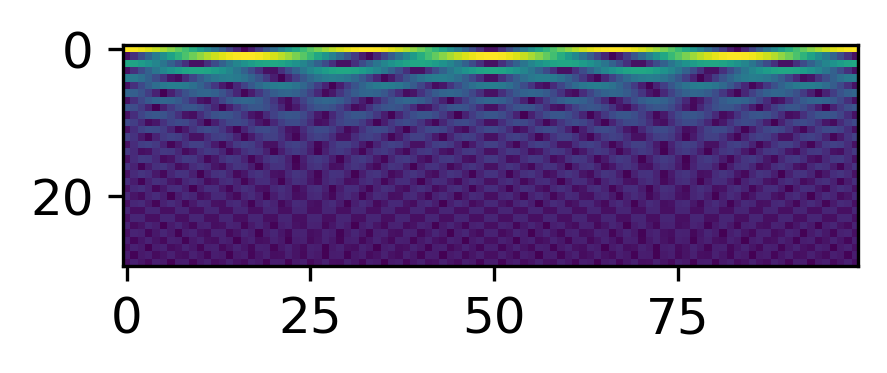

[0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614
 0.81043614 0.81043614 0.81043614 0.81043614 0.81043614 0.8104

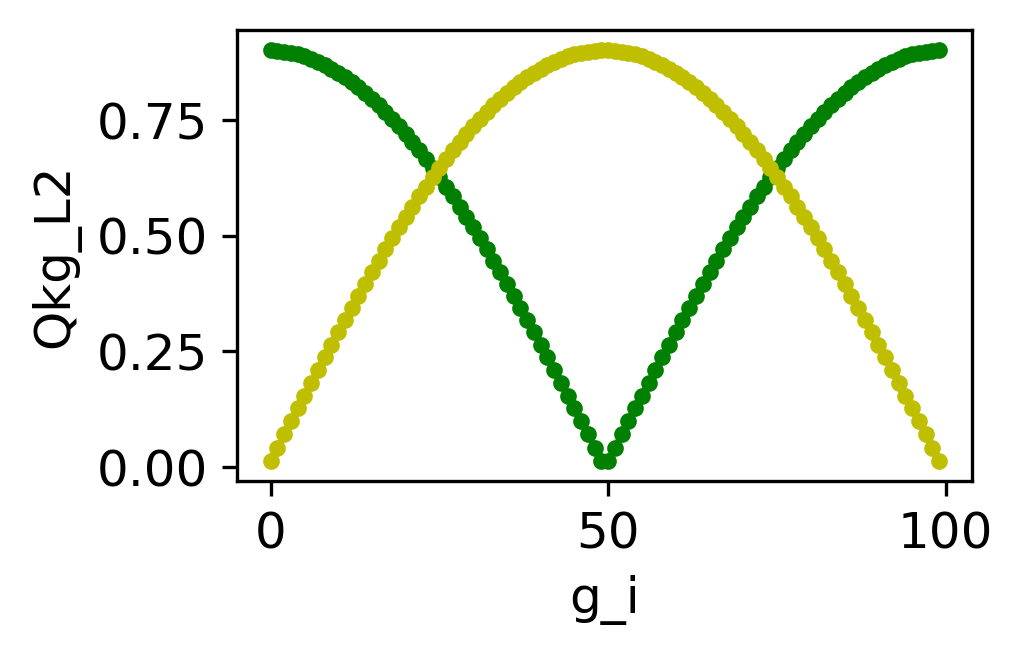

[0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997
 0.08992997 0.08992997 0.08992997 0.08992997 0.08992997 0.0899

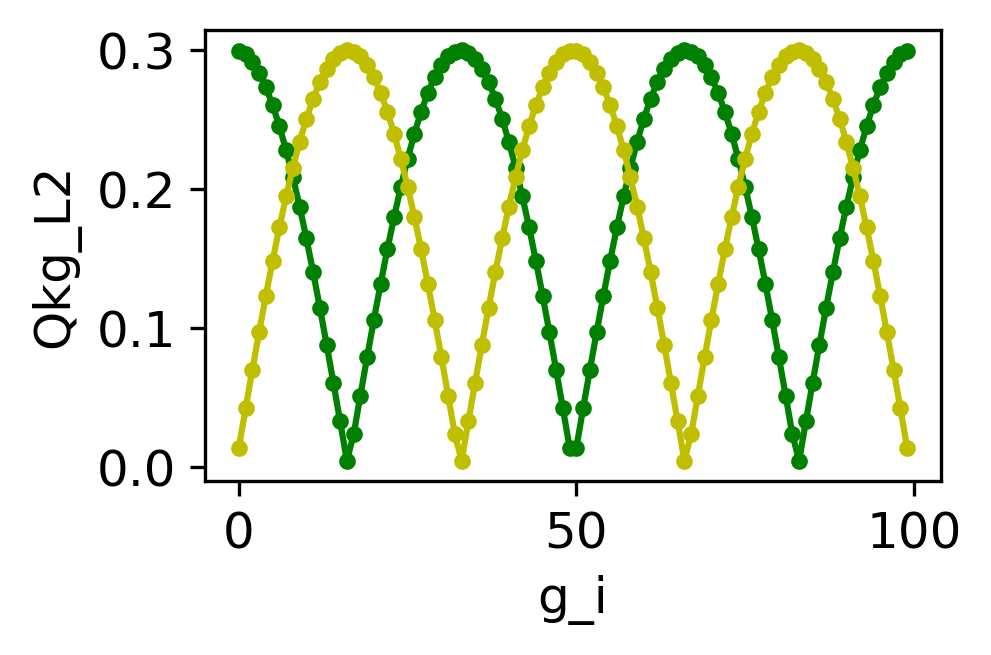

[0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953
 0.03228953 0.03228953 0.03228953 0.03228953 0.03228953 0.0322

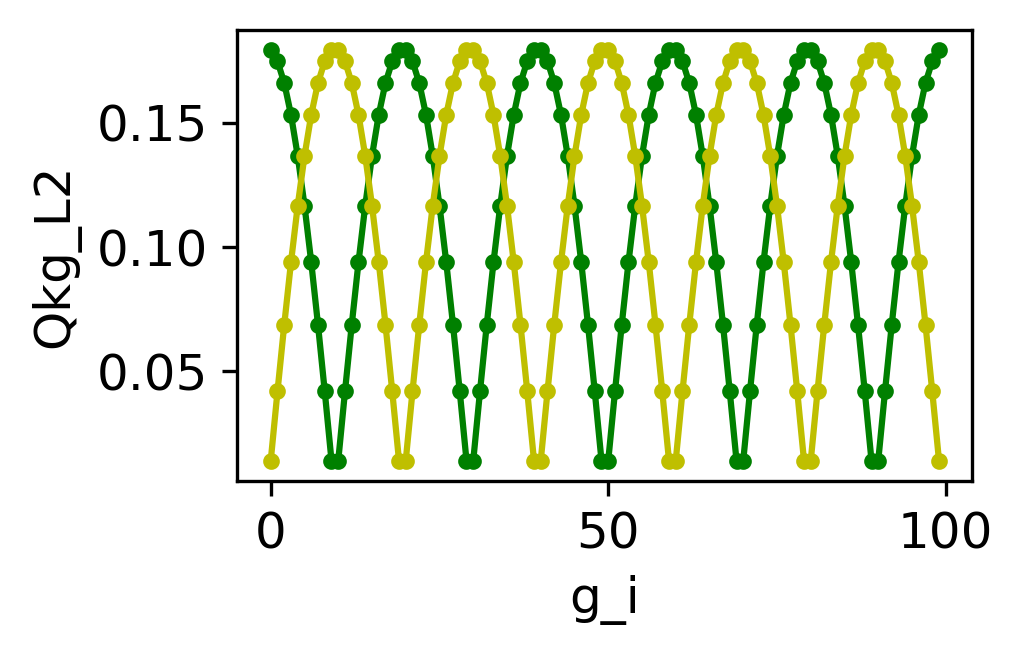

[0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906
 0.01640906 0.01640906 0.01640906 0.01640906 0.01640906 0.0164

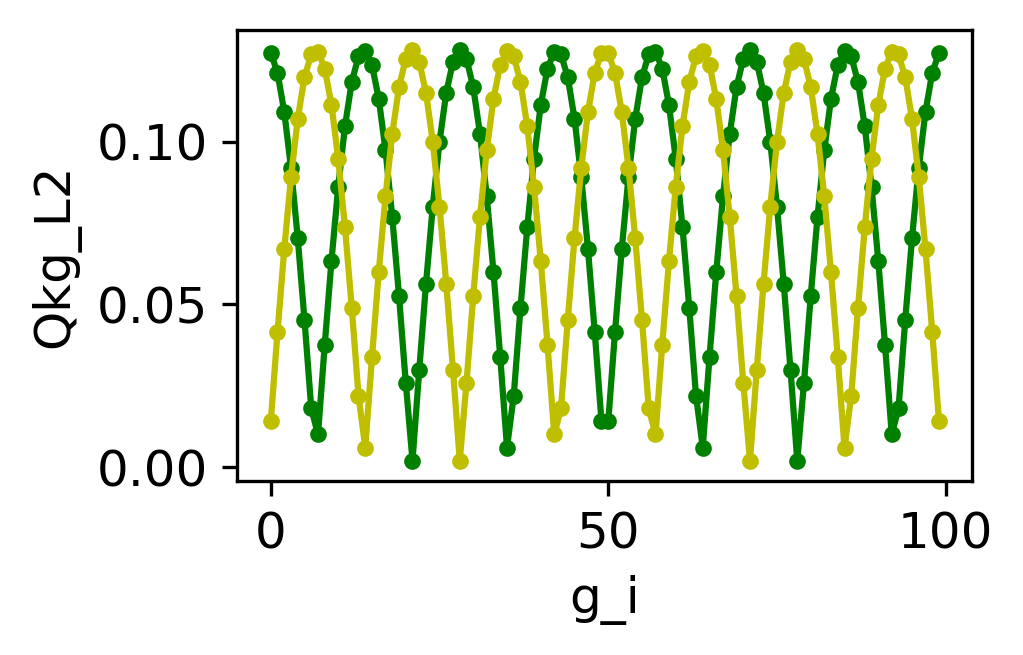

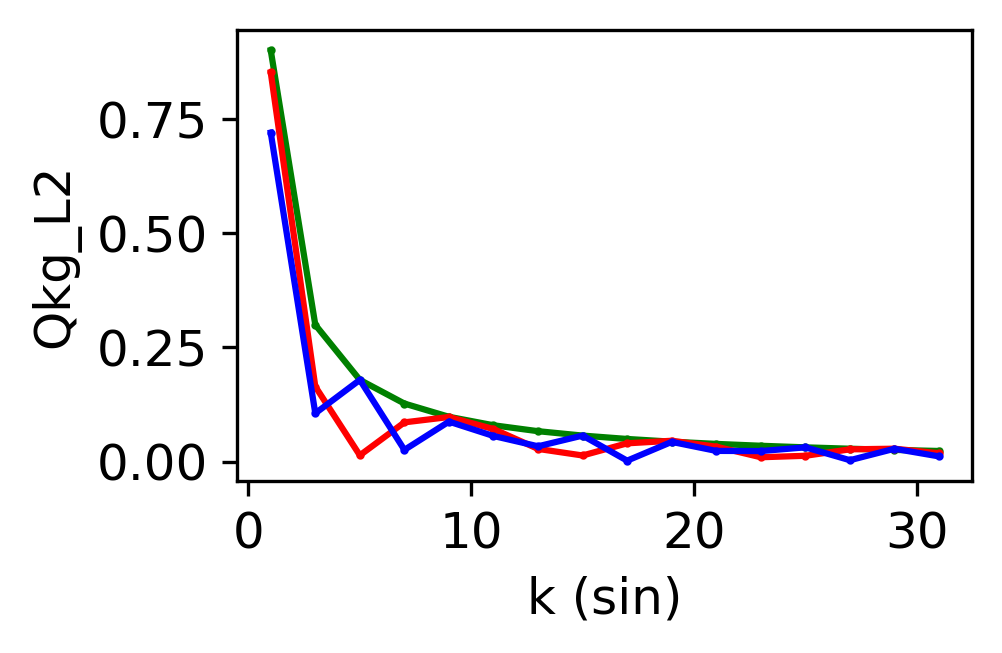

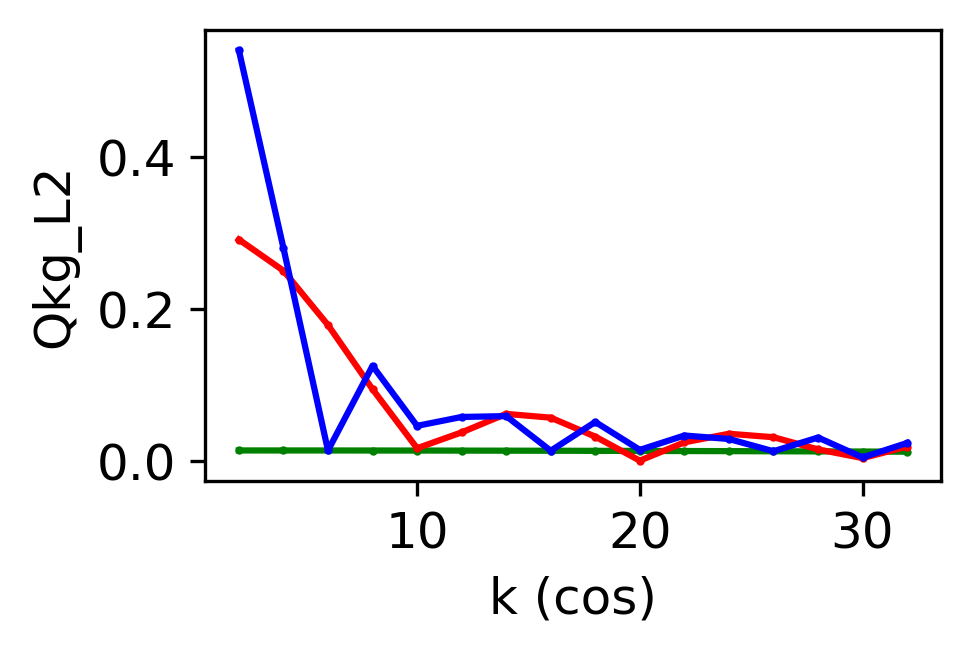

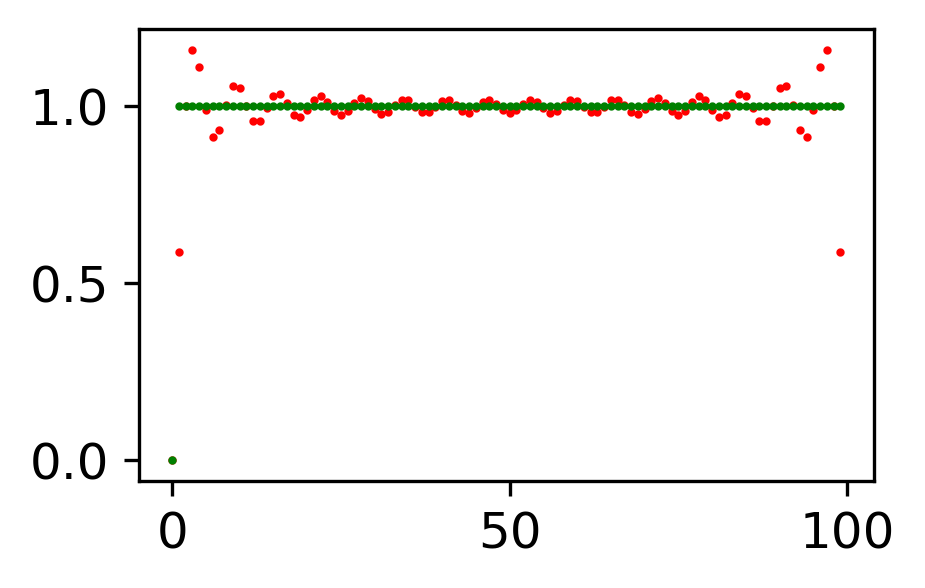

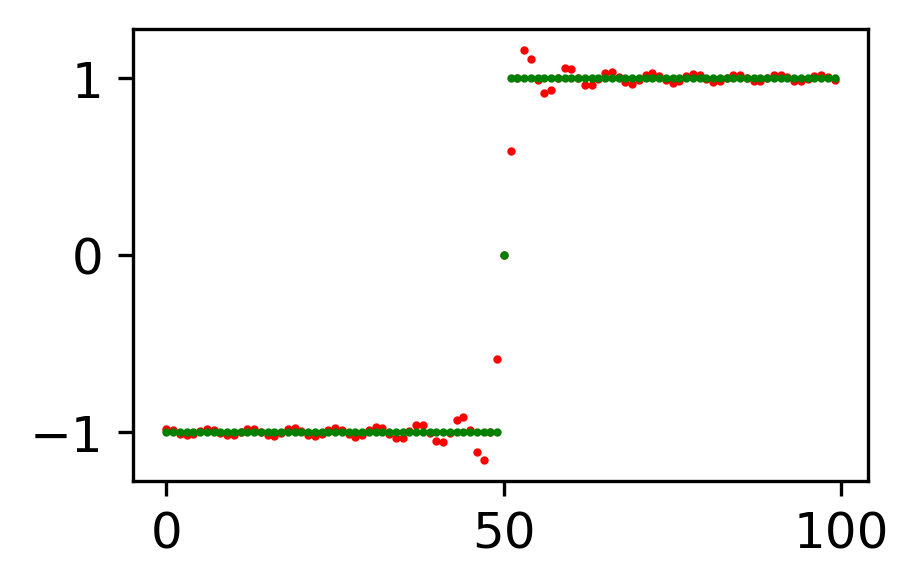

In [11]:
# Q_k: outer product, shape m, k, m. U x U.T

U = trig_basis_odd.U
j = 500
g = X#[:, (j-100):(j+100)]

Q_k = np.zeros((r, m, m))
for k in range(r):
    Q_k[k] = U[:, k] * U[:, k, None]  # outer product
print(Q_k.shape, g.shape)

Qkg = Q_k @ g  # dot product
print(Qkg.shape)



Qkg_L2 = np.mean(Qkg**2, axis=1)**.5  # L2 norm over \Omega
print(Qkg_L2.shape)

v_N = np.sum(Qkg, axis=0)

plt.imshow(Qkg_L2[2:, :], interpolation="nearest")
plt.show()

for k in range(min(r//2, 4)):
    fig, ax = plt.subplots()
    ax.plot(Qkg_L2[2*k, :], "g.-")
    ax.plot(Qkg_L2[2*k+1, :], "y.-")
    print(Qkg_L2[2*k, :] **2+Qkg_L2[2*k+1, :]**2 )
    ax.set_xlabel("g_i")
    ax.set_ylabel("Qkg_L2")
    plt.show()

k = np.arange(1, r+1)
fig, ax = plt.subplots()
ax.plot(k[::2], Qkg_L2[::2, 0], "g.-", ms=2)
ax.plot(k[::2], Qkg_L2[::2, 10], "r.-", ms=2)
ax.plot(k[::2], Qkg_L2[::2, 20], "b.-", ms=2)
ax.set_xlabel("k (sin)")
ax.set_ylabel("Qkg_L2")
plt.show()

fig, ax = plt.subplots()
ax.plot(k[1::2], Qkg_L2[1::2, 0], "g.-", ms=2)
ax.plot(k[1::2], Qkg_L2[1::2, 10], "r.-", ms=2)
ax.plot(k[1::2], Qkg_L2[1::2, 20], "b.-", ms=2)
ax.set_xlabel("k (cos)")
ax.set_ylabel("Qkg_L2")
plt.show()


fig, ax = plt.subplots()
ax.plot(v_N[:, 0], "r.", ms=2)
ax.plot(g[:, 0], "g.", ms=2)
plt.show()

fig, ax = plt.subplots()
ax.plot(v_N[:, m//2], "r.", ms=2)
ax.plot(g[:, m//2], "g.", ms=2)
plt.show()